In [1]:
import numpy as np 
from sklearn.datasets import load_iris 

X, y = load_iris(return_X_y=True)

Creating and adding noise

In [2]:
noise = np.random.RandomState(0)
X = np.hstack((X, 2 * noise.random((X.shape[0],36))))

In [3]:
# Creating the pipeline

from sklearn.pipeline import Pipeline 
from sklearn.feature_selection import SelectPercentile, f_classif 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 

In [4]:
clf = Pipeline([
    ("anova", SelectPercentile(f_classif)),
    ("scaler", StandardScaler()),
    ("svc", SVC(gamma="auto"))
])

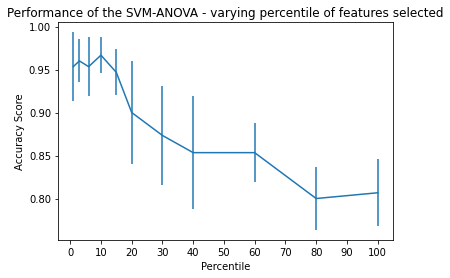

In [5]:
import matplotlib.pyplot as plt 
%matplotlib inline 

from sklearn.model_selection import cross_val_score 

score_means = list() 
score_stds = list() 

percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for i in percentiles:

    clf.set_params(anova__percentile=i)
    curr_score = cross_val_score(clf, X, y)
    score_means.append(curr_score.mean())
    score_stds.append(curr_score.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title("Performance of the SVM-ANOVA - varying percentile of features selected")
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel("Percentile")
plt.ylabel("Accuracy Score")
plt.axis("tight")
plt.show()